In [2]:
import json
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
with open("data/synthetic_data/test/anno.json", "r") as file:
    data = json.load(file)


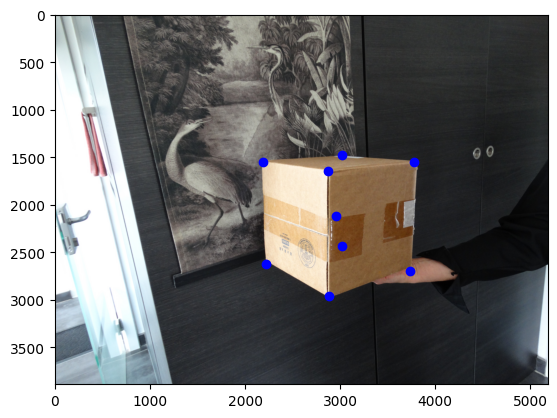

In [4]:
image = plt.imread("data/synthetic_data/test/50.jpg")
plt.imshow(image)

for p in data[50]['projection']:
     plt.plot(p[0],p[1], 'bo')

# p = data[0]['projection'] 
# plt.plot(p[2][0],p[2][1], 'bo')
# plt.show()

plt.show()
